In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Ampliación de Inteligencia Artificial

### Práctica 1 de introducción a scikit learn (Iris)

Vamos a mostrar aquí como  cargar un conjunto de datos que ya existe en scikit_learn, y cómo aplicarle un clasificador (knn en este caso), y evaluando el rendimiento. 

## Carga de datos: iris

Para nuestros ejemplos, usremos el conjunto de datos de la flor de iris, disponible en scikit-learn como uno de los conjuntos predefinidos de la biblioteca

#### Ejercicio 1

Cargar el conjunto de datos del iris en una variable `iris`. Mostrar el número de ejemplos y de columnas, los nombres de las caractaerísticas y los nombres de las posibles clases (indicación: consultar `load_iris` en el manual).

In [5]:
# === Solución
from sklearn.datasets import load_iris
iris = load_iris()


In [6]:
# Datos
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# Número de filas y columnas
iris.data.shape


(150, 4)

In [8]:
# Nombre de las cuatro columnas:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# Nombre de las clases:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# Valores de clasificación de cada ejemplo
# 0:setosa, 1:versicolor, 2:virginica 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Cargamos los datos en variables X_iris, y_iris
# En X_names, y_names los nombres de las columnas y las clases, resp.

X_iris, y_iris = iris.data, iris.target
X_names, y_names = iris.feature_names, iris.target_names


## Visualización de los datos 


#### Ejercicio 2

Puesto que los datos son 4-dimensionales, para tener algún tipo de visualización, puede ser interesante tener representaciones 2D en las que tenemos en cuanta sólo dos de las cuatro características. 

Por ejemplo, hacer en una única gráfica tres nubes de puntos. Cada punto representa un ejemplo del conjunto de datos, con coordenadas dadas resectivamente por la longitud y la anchura de sépalo. Los puntos de cada clase se distinguen por su color y su forma. Por ejemplo:

<img src="https://www.cs.us.es/~jruiz/repository/iris.png">

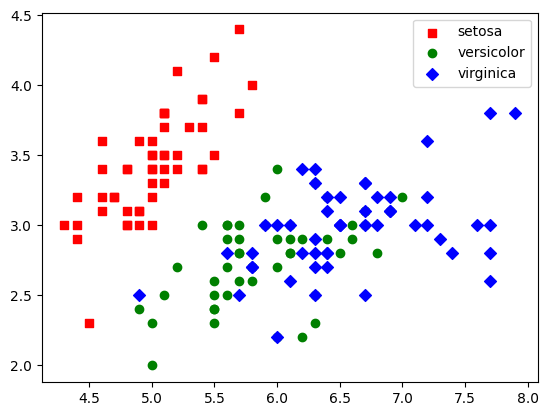

In [14]:
# ==== Solución:

for tipo, marca, color, in zip(range(len(y_names)), "soD", "rgb"):
    plt.scatter(X_iris[:, 0][y_iris == tipo],
            X_iris[:, 1][y_iris == tipo],
            marker = marca, color = color)

plt.legend(y_names)
plt.show()

#### Ejercicio 3

Definir una función:

  `representacion_grafica_iris(c1,c2)`
  
que generalice la construcción de la gráfica anterior, permitiendo dar las columnas `c1` y `c2` (sus índices) que indican que dos características se usan como coordenadas en la representación 2D.

Por ejemplo, `representacion_grafica_iris(0,1)` mostraría el gráfico anterior.

In [22]:
# === Solución:
def representacion_grafica_iris(x, y):
    for tipo, marca, color, in zip(range(len(y_names)), "soD", "rgb"):
        plt.scatter(X_iris[:, x][y_iris == tipo],
            X_iris[:, y][y_iris == tipo],
            marker = marca, color = color)


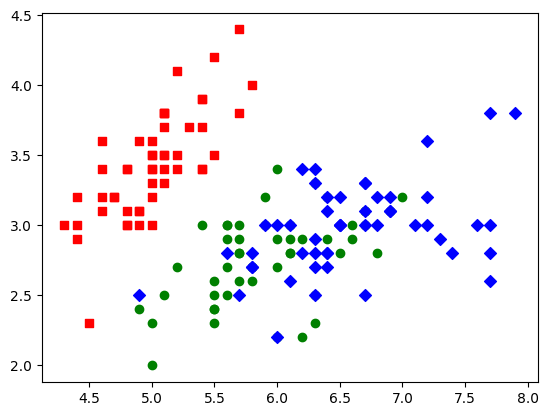

In [23]:
representacion_grafica_iris(0,1)

In [19]:
import pandas as pd

In [29]:
iris_panda = pd.DataFrame(X_iris, columns = X_names)
iris_panda

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Separación de los datos

#### Ejercicio 4

Separar el total de datos en entrenamiento y prueba (75%-25%)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = 0.25, random_state=0)

## Normalización de los datos

Frecuentemente no todas las características son de la misma magnitud, lo que puede interferir en la precisión de los modelos aprendidos. En scikit-learn podemos normalizar los datos   

Un normalizador que se usa con frencuencia es el normalizador estándar, que ajusta cada caractarística para que su media sea cero y su desviación típica 1.

#### Ejercicio 5

Normalizar los datos usando `StandardScaler`

In [40]:
# === Solución:

from sklearn.preprocessing import StandardScaler

# Crear y ajustar el normalizador
normalizador = StandardScaler().fit(X_train)

Podemos incluso acceder a los parámetros que se han "aprendido" tras hacer fit, ya que quedan guardado en un par de atributos del objeto normalizador:

In [13]:
# Imprimir las medias y desviaciones típicas calculadas

Ahora podemos aplicar el método transform para normalizar cualquier conjunto de datos, usando los parámetros calculados:

In [14]:
# Transformar los datos




In [15]:
# Comprobar las nuevas media y desviación típica de los datos normalizados



## Clasificador Knn

#### Ejercicio 6

Aplicar a los datos normalizados el clasificador Knn (`KNeighborsClassifier`) con n=7, y medir el rendimiento sobre el conjunto de entrenamiento

In [45]:
# ==== Solución
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
# Crear el clasificador

Lo entrenamos, con los datos normalizados. Obsérvese cómo el resultado de entrenar es el propio clasificador:

In [53]:
# Entrenarlo
knn.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=7)

In [54]:
# Medir el rendimiento sobre el conjunto de entrenamiento



#### Ejercicio 7

Comparar las predicciones que hace el clasificador sobre el conjunto de test, respecto de las reales. Medir el rendimiento del clasificador sobre el conjunto de test

In [55]:
# ==== Solución:
Xn_test = normalizador.transform(X_test)
knn.predict(Xn_test)

# Predicciones:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Las clases reales son las siguientes:

In [56]:
# Clases reales:
y_test


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

Como se observa, la predicción ha sido bastante buena. El método score del clasificador (que calcula el porcentaje de ejemplos cuya predicción es la correcta), nos lo confirma:

In [21]:
# Dar el rendimiento sobre test
knn.score(Xn_test, y_test)


## Datos del cancer de mama

Los datos *UCI ML Breast Cancer Wisconsin* son datos que clasifican imágenes de tumores en el pecho, en malignos y benignos, junto con una serie de características tomadas de la imagen (radio, textura,...) Son en total 569 datos con 30 características.

En scikit learn están accesibles con `load_breast_cancer`. 

#### Ejercicio 8

Aplicar Knn (con n=5) a dicho conjunto. Separar en entrenamiento y prueba, y normalizar previamente, como en el ejercicio anterior. Calcular el rendimiento, tanto sobre entrenamiento como con prueba. 

In [65]:
# === Solución:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier(n_neighbors = 5)

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.25, random_state=0)
normalizador = StandardScaler().fit(X_train)

Xn_train = normalizador.transform(X_train)
Xn_test = normalizador.transform(X_test)

knn.fit(Xn_train, y_train)

knn.predict(Xn_test)

print(knn.score(Xn_test, y_test))
print(knn.score(Xn_train, y_train))


0.951048951048951
0.9741784037558685


In [58]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### Ejercicio 9

Dibujar una gráfica (mediante `plot` de `matplotlib.pyplot`) en el que se muestre como evoluciona el rendimiento del clasificador knn en función del número de vecinos (de 1 a 10), tanto en entrenamiento como en test.

Comentar el resultado de la gráfica.

In [23]:
# === Solución

